<a href="https://colab.research.google.com/github/asu-trans-ai-lab/OSM2GMNS/blob/master/osm2gmns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
!pip install osm2gmns --upgrade

Requirement already up-to-date: osm2gmns in /usr/local/lib/python3.7/dist-packages (0.4.0)


In [2]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving asu.osm to asu.osm
User uploaded file "asu.osm" with length 5284877 bytes


In [3]:
import osm2gmns as og
net = og.getNetFromOSMFile('asu.osm', POIs=True)
og.connectPOIWithNet(net)
og.generateNodeActivityInfo(net)
og.outputNetToCSV(net)

osm2gmns, version 0.4.0


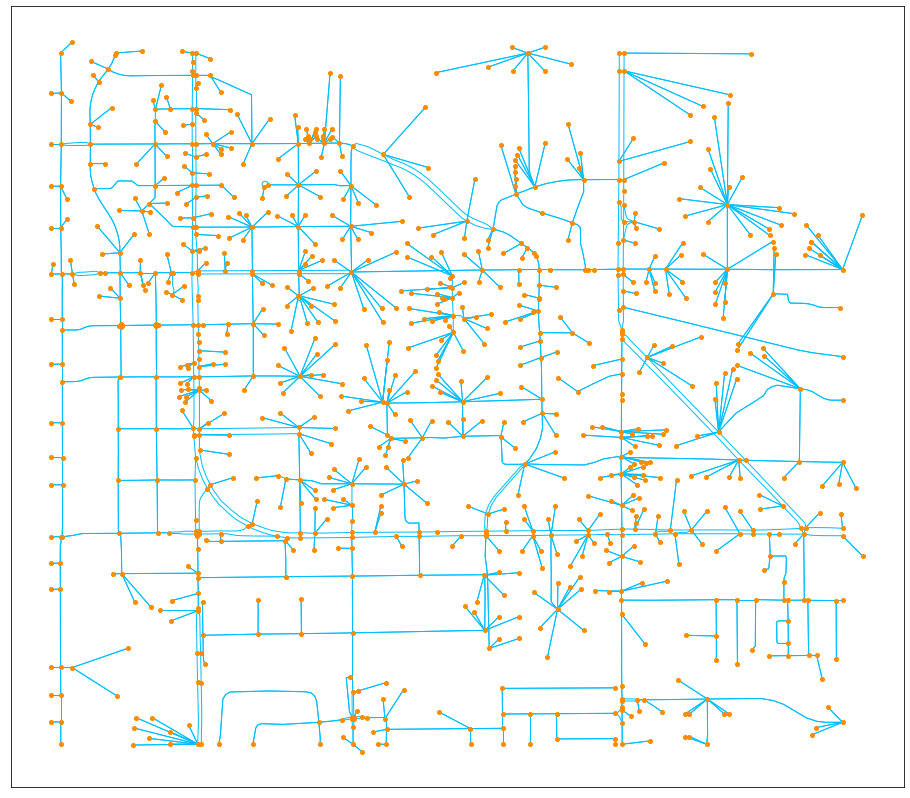

In [4]:
og.show(net)

In [6]:
og.saveFig(net) 